<a href="https://colab.research.google.com/github/dipu-k/House-prediction/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [33]:
df=pd.read_csv("/content/data.csv")

In [35]:
df.head(25).T

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
id,7129300520,6414100192,5631500400,2487200875,1954400510,7237550310,1321400060,2008000270,2414600126,3793500160,...,9297300055,1875500060,6865200140,16000397,7983200060,6300500875,2524049179,7137970340,8091400200,3814700200
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000,20140512T000000,20140627T000000,20150115T000000,20150415T000000,20150312T000000,...,20150124T000000,20140731T000000,20140529T000000,20141205T000000,20150424T000000,20140514T000000,20140826T000000,20140703T000000,20140516T000000,20141120T000000
price,221900.0,538000.0,180000.0,604000.0,510000.0,1225000.0,257500.0,291850.0,229500.0,323000.0,...,650000.0,395000.0,485000.0,189000.0,230000.0,385000.0,2000000.0,285000.0,252700.0,329000.0
bedrooms,3,3,2,4,3,4,3,3,3,3,...,4,3,4,2,3,4,3,5,2,3
bathrooms,1.0,2.25,1.0,3.0,2.0,4.5,2.25,1.5,1.0,2.5,...,3.0,2.0,1.0,1.0,1.0,1.75,2.75,2.5,1.5,2.25
sqft_living,1180,2570,770,1960,1680,5420,1715,1060,1780,1890,...,2950,1890,1600,1200,1250,1620,3050,2270,1070,2450
sqft_lot,5650,7242,10000,5000,8080,101930,6819,9711,7470,6560,...,5000,14040,4300,9850,9774,4980,44867,6300,9643,6500
floors,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,...,2.0,2.0,1.5,1.0,1.0,1.0,1.0,2.0,1.0,2.0
waterfront,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
view,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,4,0,0,0


In [36]:
#describtion of data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [37]:
#consider the shape of data
df.shape

(21613, 21)

In [38]:
#calculating age from yr_built
df['yr_built']=2023-df['yr_built']

In [39]:
df['yr_built'].head()

,yr_built
0,68
1,72
2,90
3,58
4,36


In [40]:
df.drop(columns=['id','date'],axis =1, inplace =True)

In [41]:
df.head().T

,0,1,2,3,4
price,221900.0000,538000.000,180000.0000,604000.0000,510000.0000
bedrooms,3.0000,3.000,2.0000,4.0000,3.0000
bathrooms,1.0000,2.250,1.0000,3.0000,2.0000
sqft_living,1180.0000,2570.000,770.0000,1960.0000,1680.0000
sqft_lot,5650.0000,7242.000,10000.0000,5000.0000,8080.0000
floors,1.0000,2.000,1.0000,1.0000,1.0000
waterfront,0.0000,0.000,0.0000,0.0000,0.0000
view,0.0000,0.000,0.0000,0.0000,0.0000
condition,3.0000,3.000,3.0000,5.0000,3.0000
grade,7.0000,7.000,6.0000,7.0000,8.0000


In [42]:
#bathrooms have some decimal values which is insane(after searching the decimals describes if the bathroom have shower or not but i decide to ignore this)
df['bathrooms'].head(10)

,bathrooms
0,1.00
1,2.25
2,1.00
3,3.00
4,2.00
5,4.50
6,2.25
7,1.50
8,1.00
9,2.50


In [43]:
#rounding our features to get rid from decimals
df['bathrooms']=df['bathrooms'].round(decimals = 0)

In [44]:
df['bathrooms'].head(10)

,bathrooms
0,1.0
1,2.0
2,1.0
3,3.0
4,2.0
5,4.0
6,2.0
7,2.0
8,1.0
9,2.0


In [45]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [46]:
df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [47]:
df['floors']=df['floors'].round(decimals = 0)

In [48]:
df['floors'].unique()

array([1., 2., 3., 4.])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [50]:
df.isna().sum().sum()

0

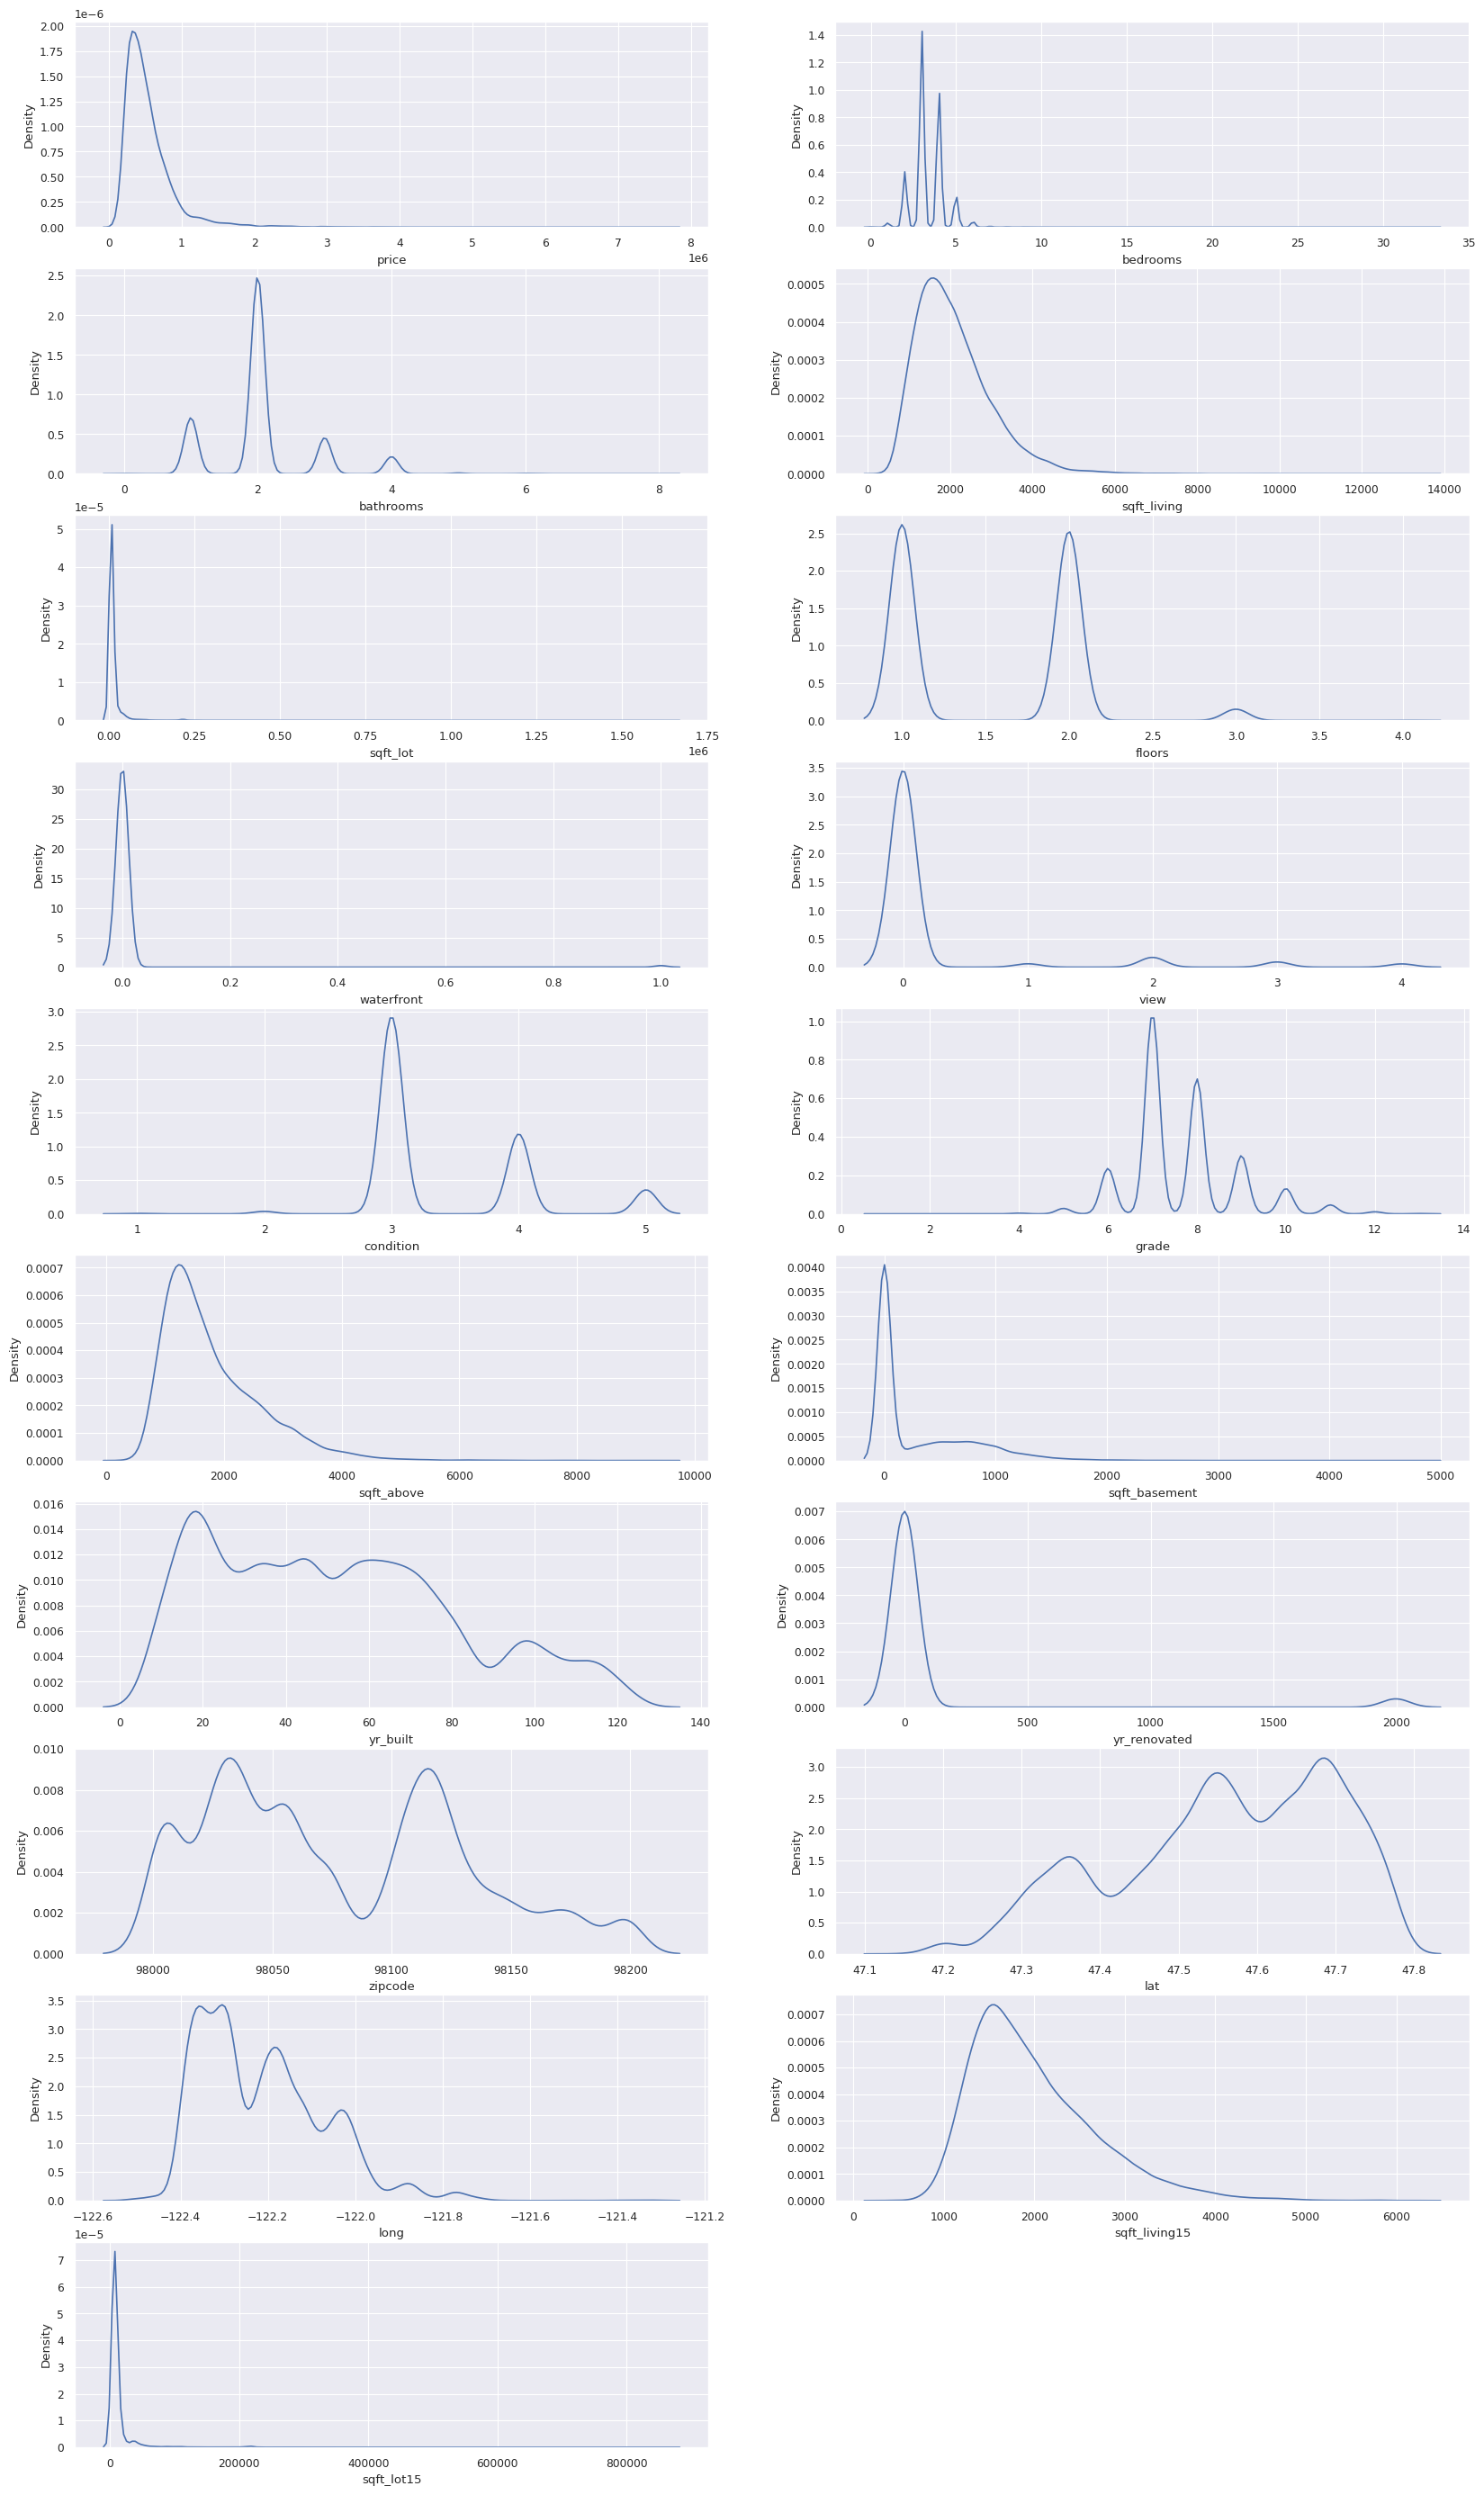

In [51]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(10, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)

plt.show()


<Axes: ylabel='Frequency'>

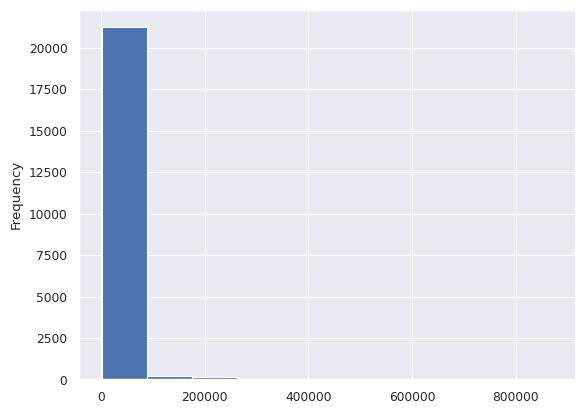

In [52]:
df['sqft_lot15'].plot(kind = 'hist')

In [53]:
df.skew()

,0
price,4.024069
bedrooms,1.974300
bathrooms,1.083906
sqft_living,1.471555
sqft_lot,13.060019
floors,0.392907
waterfront,11.385108
view,3.395750
condition,1.032805
grade,0.771103


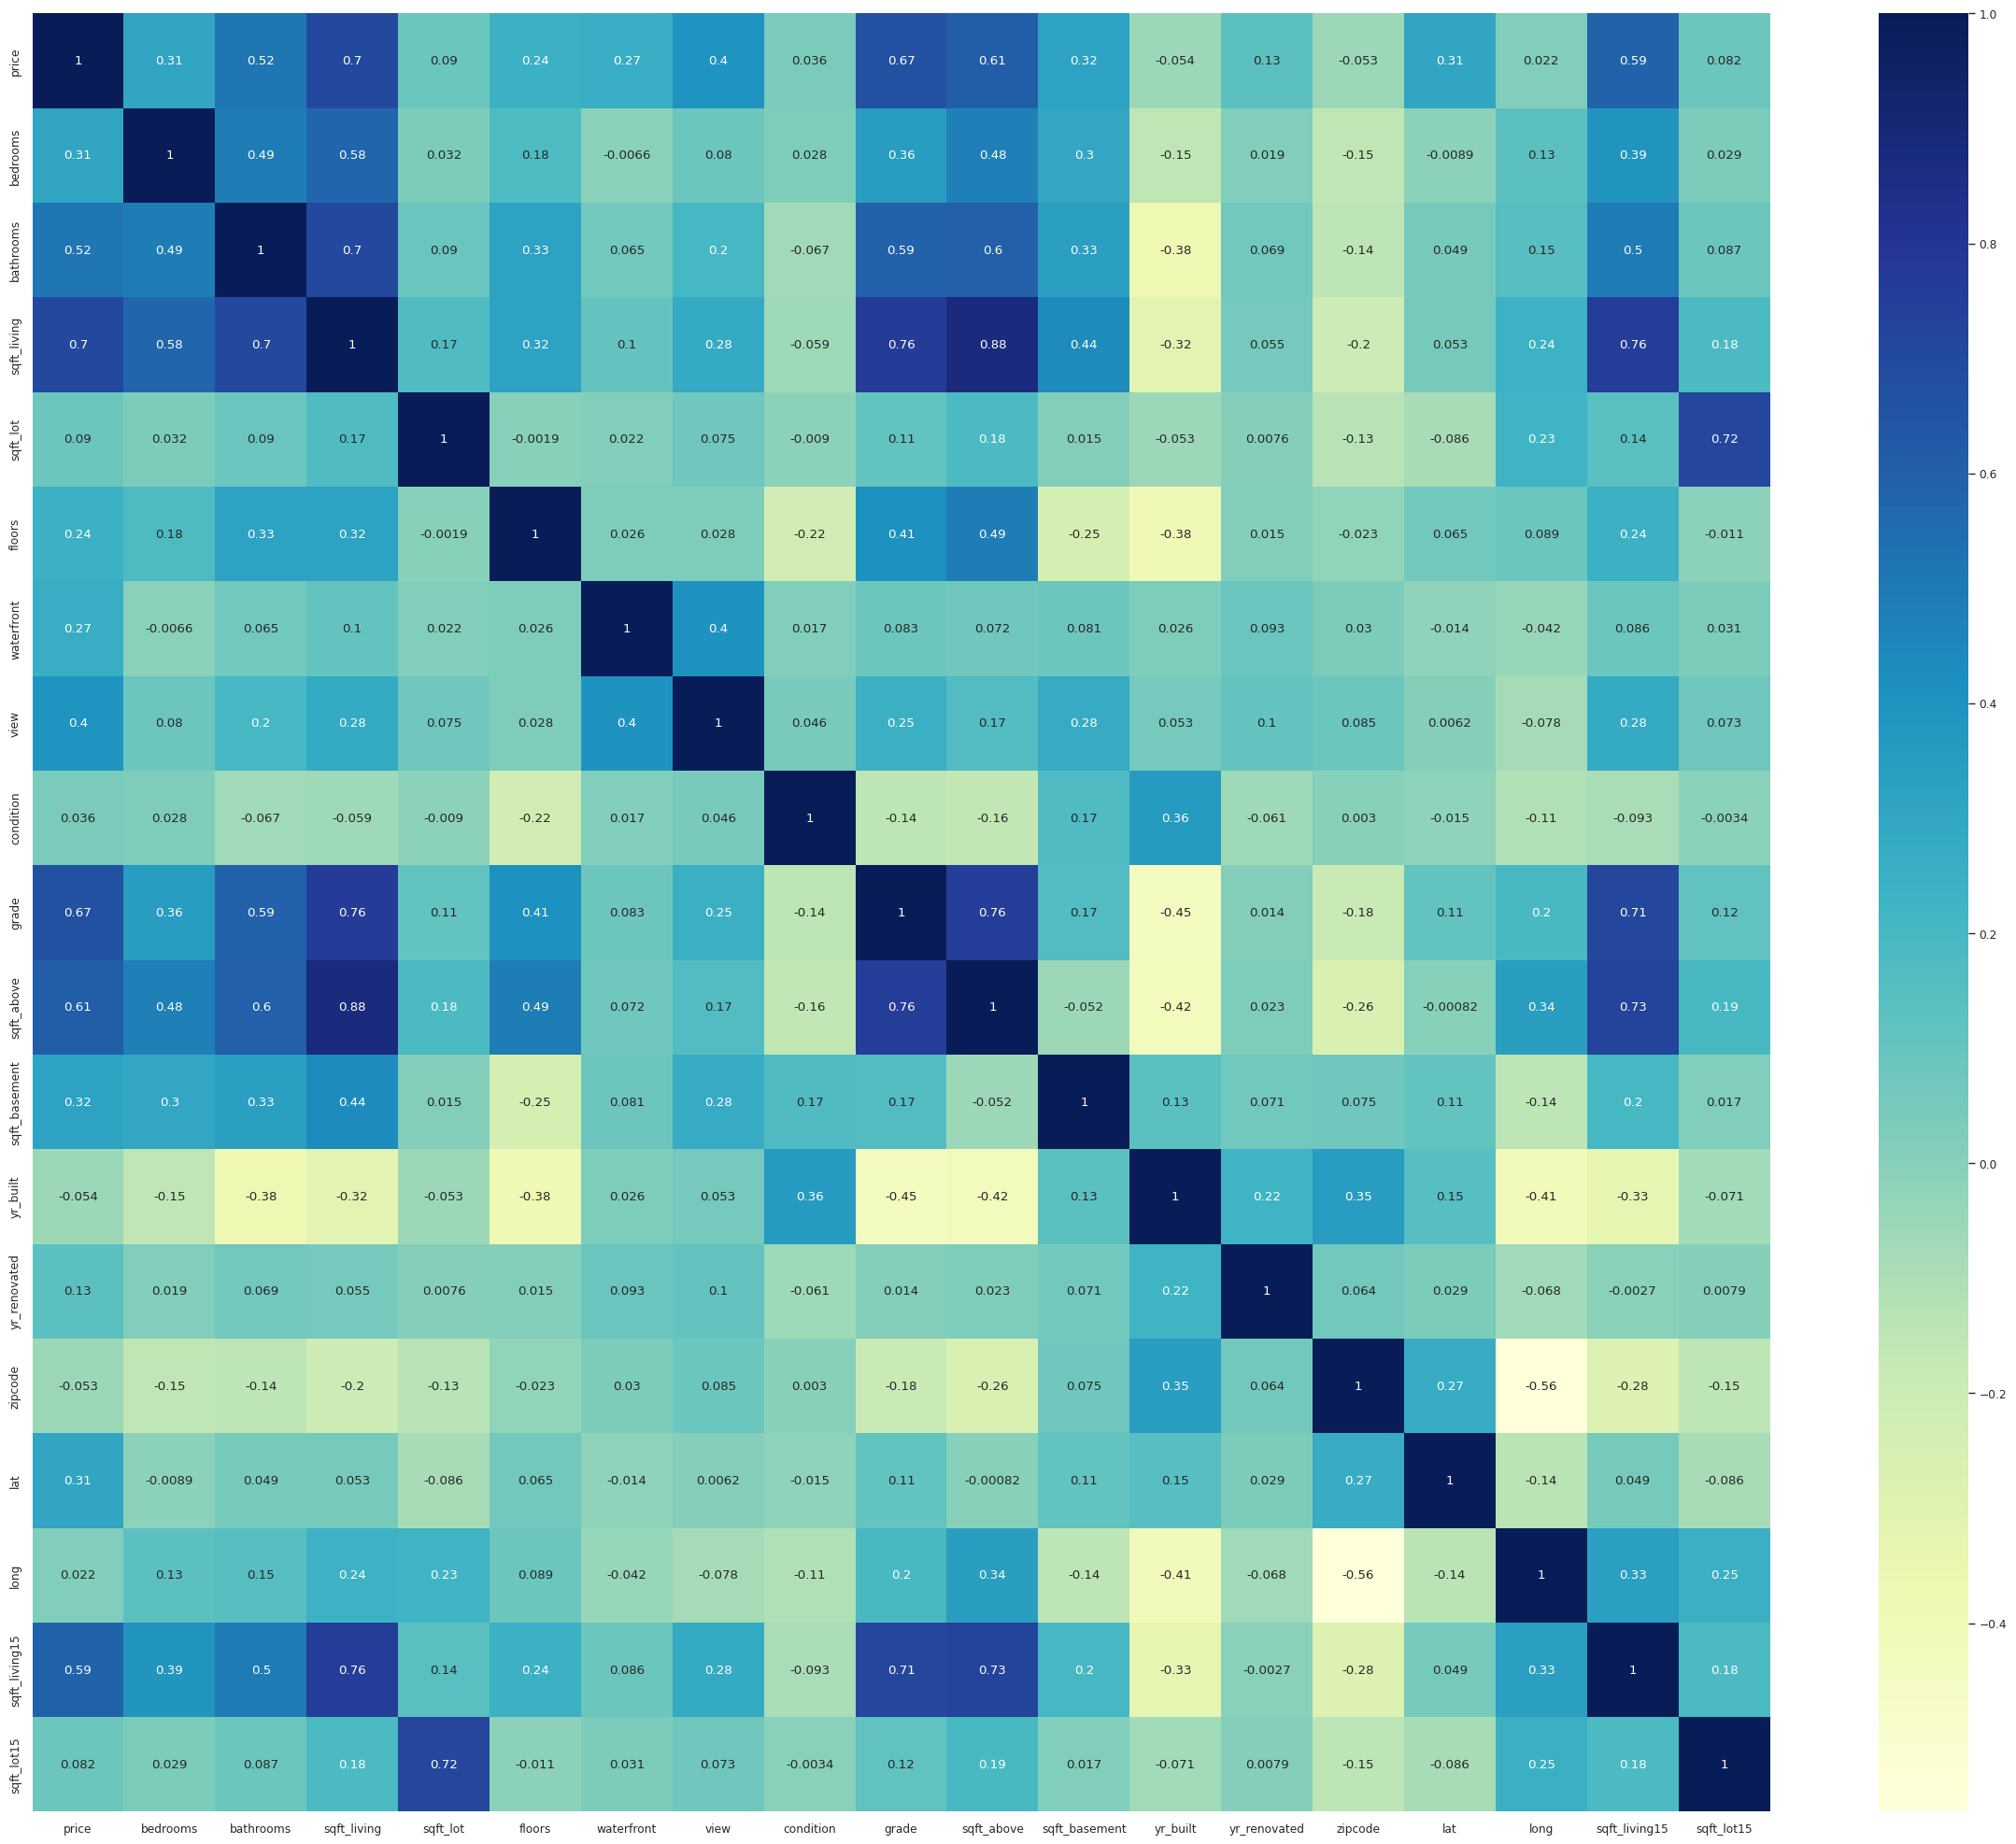

In [54]:
#check correlation before applying trasformation
plt.figure(figsize = (30, 25))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [55]:
#we cannt use log trnsformation bocause '0' values will result to inf values in the dataframe
df['price']=np.sqrt(df['price'])

df['sqft_lot']=np.sqrt(df['sqft_lot'])

df['waterfront']=np.sqrt(df['waterfront'])

df['yr_renovated']=np.sqrt(df['yr_renovated'])

df['sqft_lot15']=np.sqrt(df['sqft_lot15'])

In [56]:
#scaling data due to very high ranges
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

M = df['price'].to_numpy()
df['price']=scaler.fit_transform(M.reshape(-1,1))

M = df['sqft_lot'].to_numpy()
df['sqft_lot']=scaler.fit_transform(M.reshape(-1,1))

M = df['waterfront'].to_numpy()
df['waterfront']=scaler.fit_transform(M.reshape(-1,1))

M = df['yr_renovated'].to_numpy()
df['yr_renovated']=scaler.fit_transform(M.reshape(-1,1))

M = df['sqft_lot15'].to_numpy()
df['sqft_lot15']=scaler.fit_transform(M.reshape(-1,1))


In [57]:
#check that scaling is applied
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.078848,3,1.0,1180,0.041484,1.0,0.0,0,3,7,1180,0,68,0.000000,98178,47.5112,-122.257,1340,0.054691
1,0.183774,3,2.0,2570,0.049354,2.0,0.0,0,3,7,2170,400,72,0.994027,98125,47.7210,-122.319,1690,0.068167
2,0.060136,2,1.0,770,0.061158,1.0,0.0,0,3,6,770,0,90,0.000000,98028,47.7379,-122.233,2720,0.070797
3,0.201243,4,3.0,1960,0.037954,1.0,0.0,0,5,7,1050,910,58,0.000000,98136,47.5208,-122.393,1360,0.049783
4,0.176040,3,2.0,1680,0.053147,1.0,0.0,0,3,8,1680,0,36,0.000000,98074,47.6168,-122.045,1800,0.067306


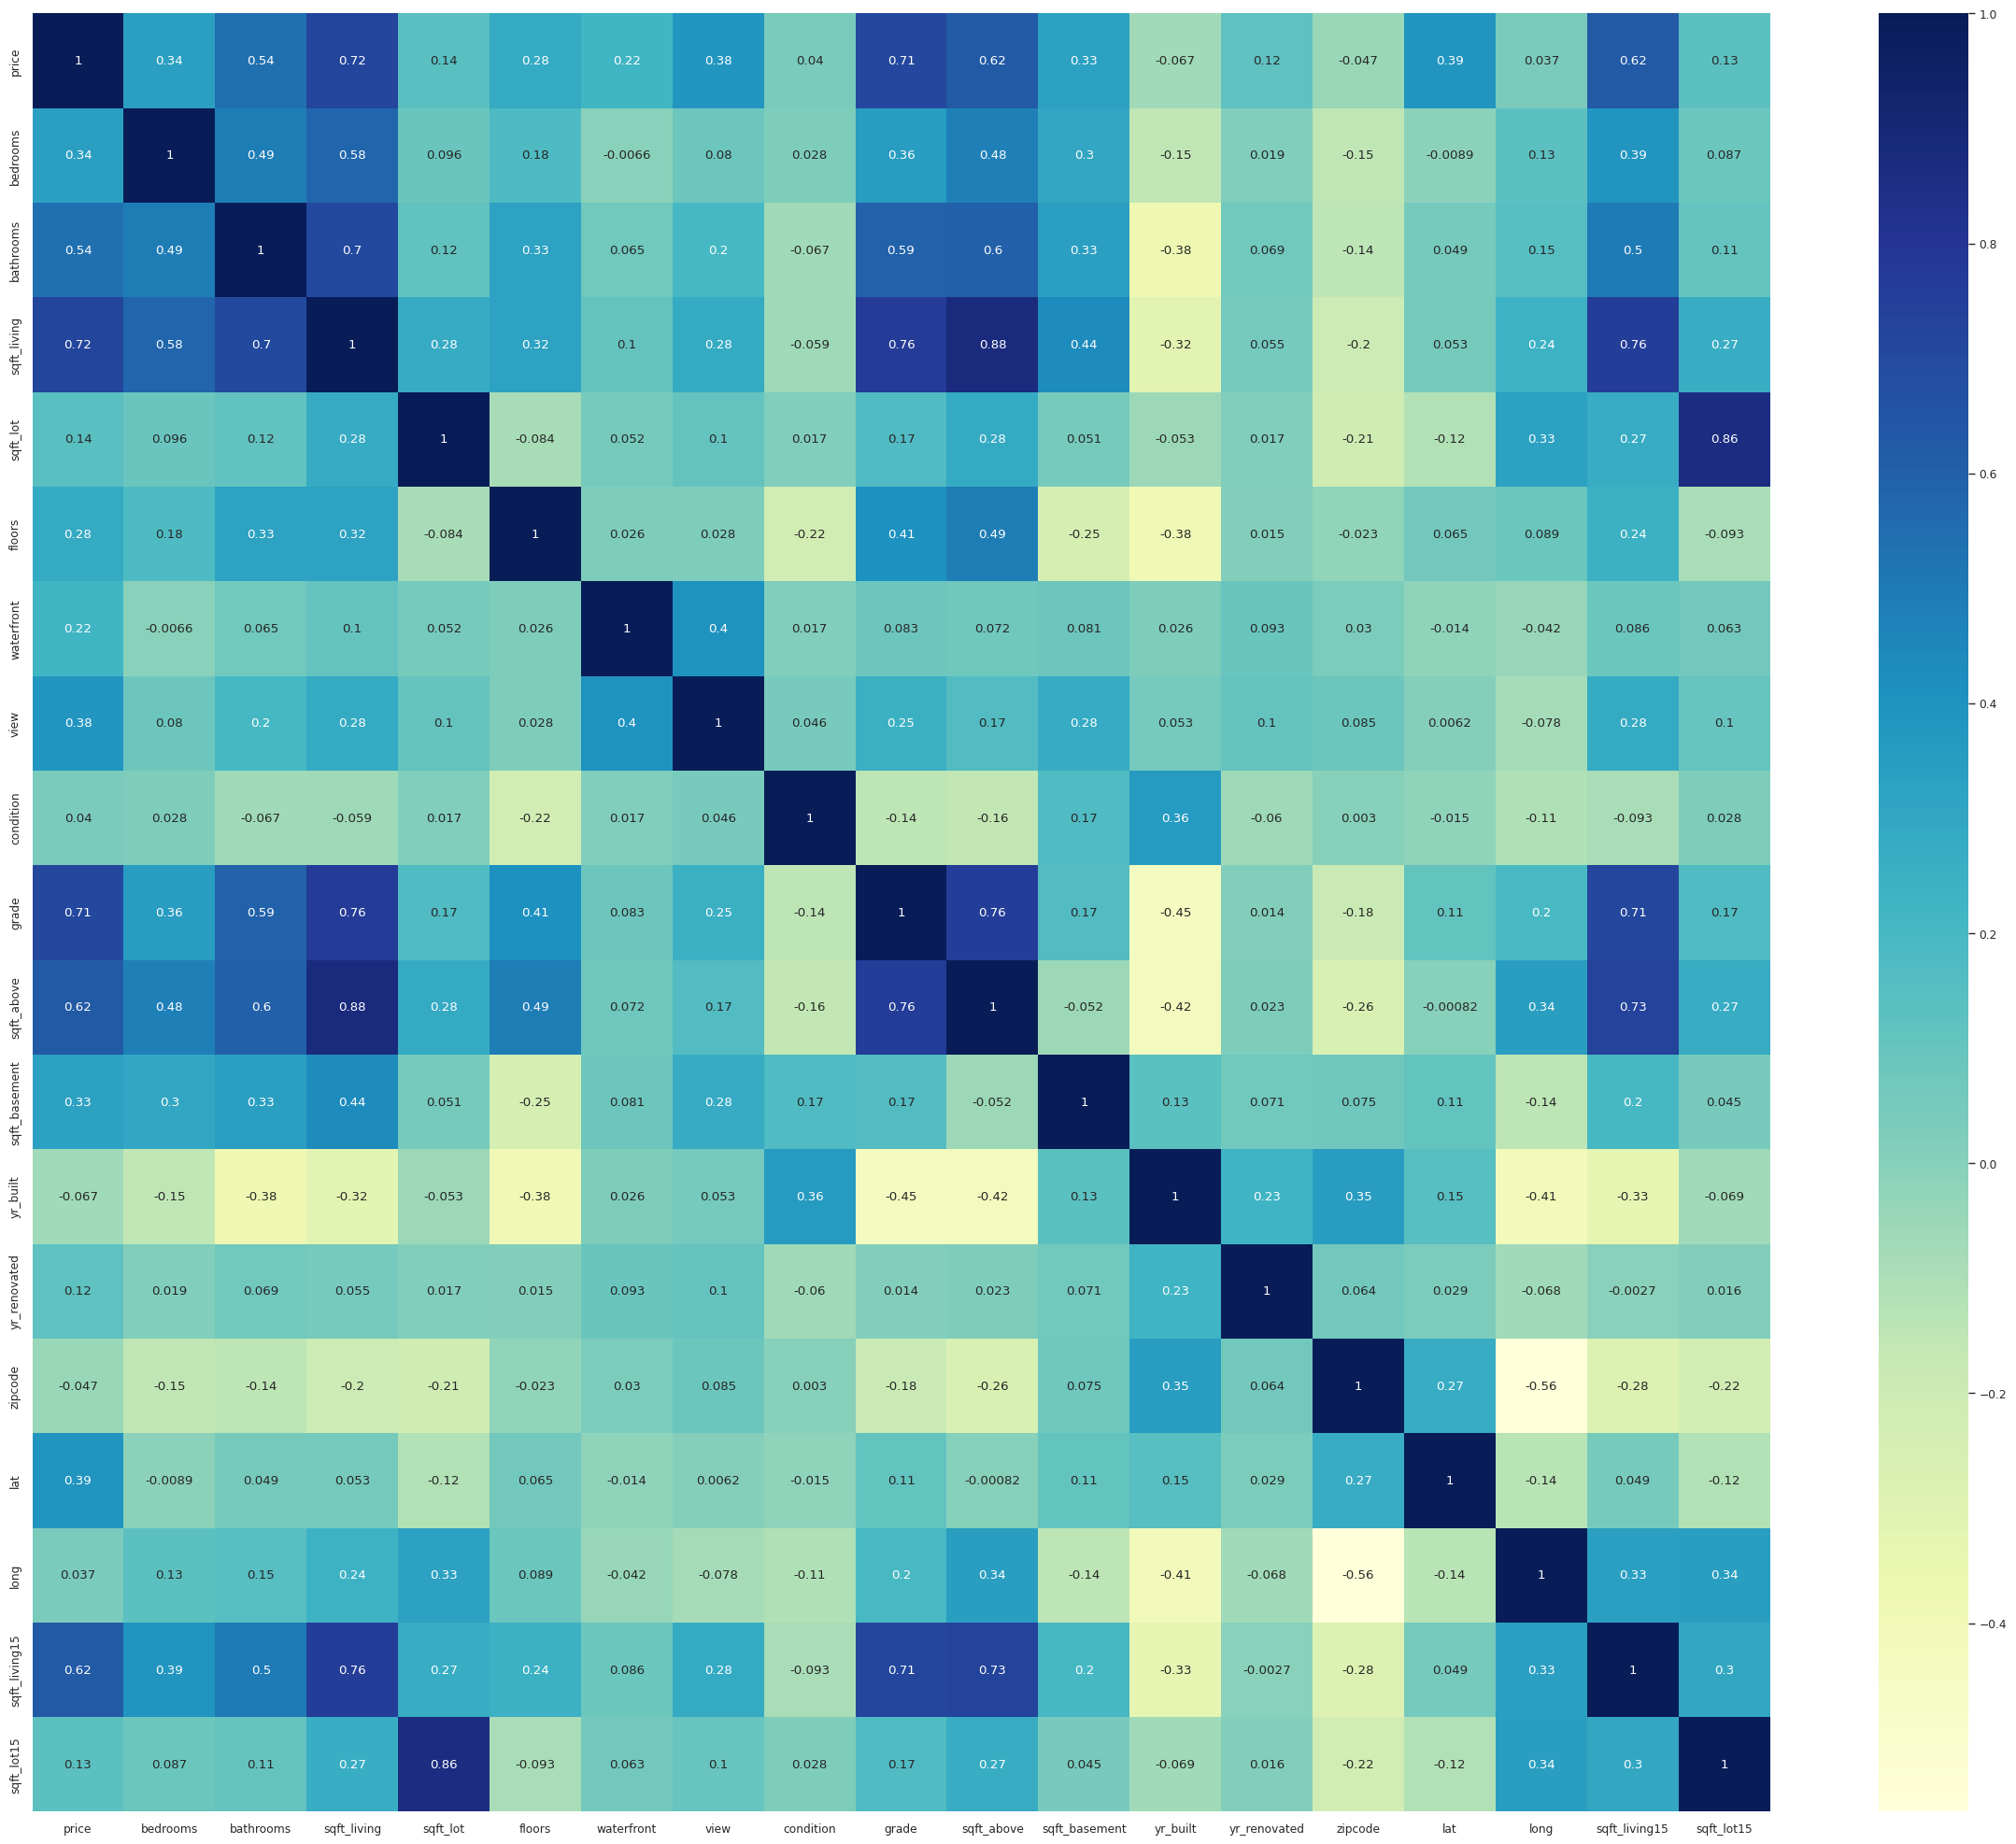

In [58]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [59]:
df.skew()
#it improved

,0
price,1.656392
bedrooms,1.974300
bathrooms,1.083906
sqft_living,1.471555
sqft_lot,4.783397
floors,0.392907
waterfront,11.385108
view,3.395750
condition,1.032805
grade,0.771103


<Axes: >

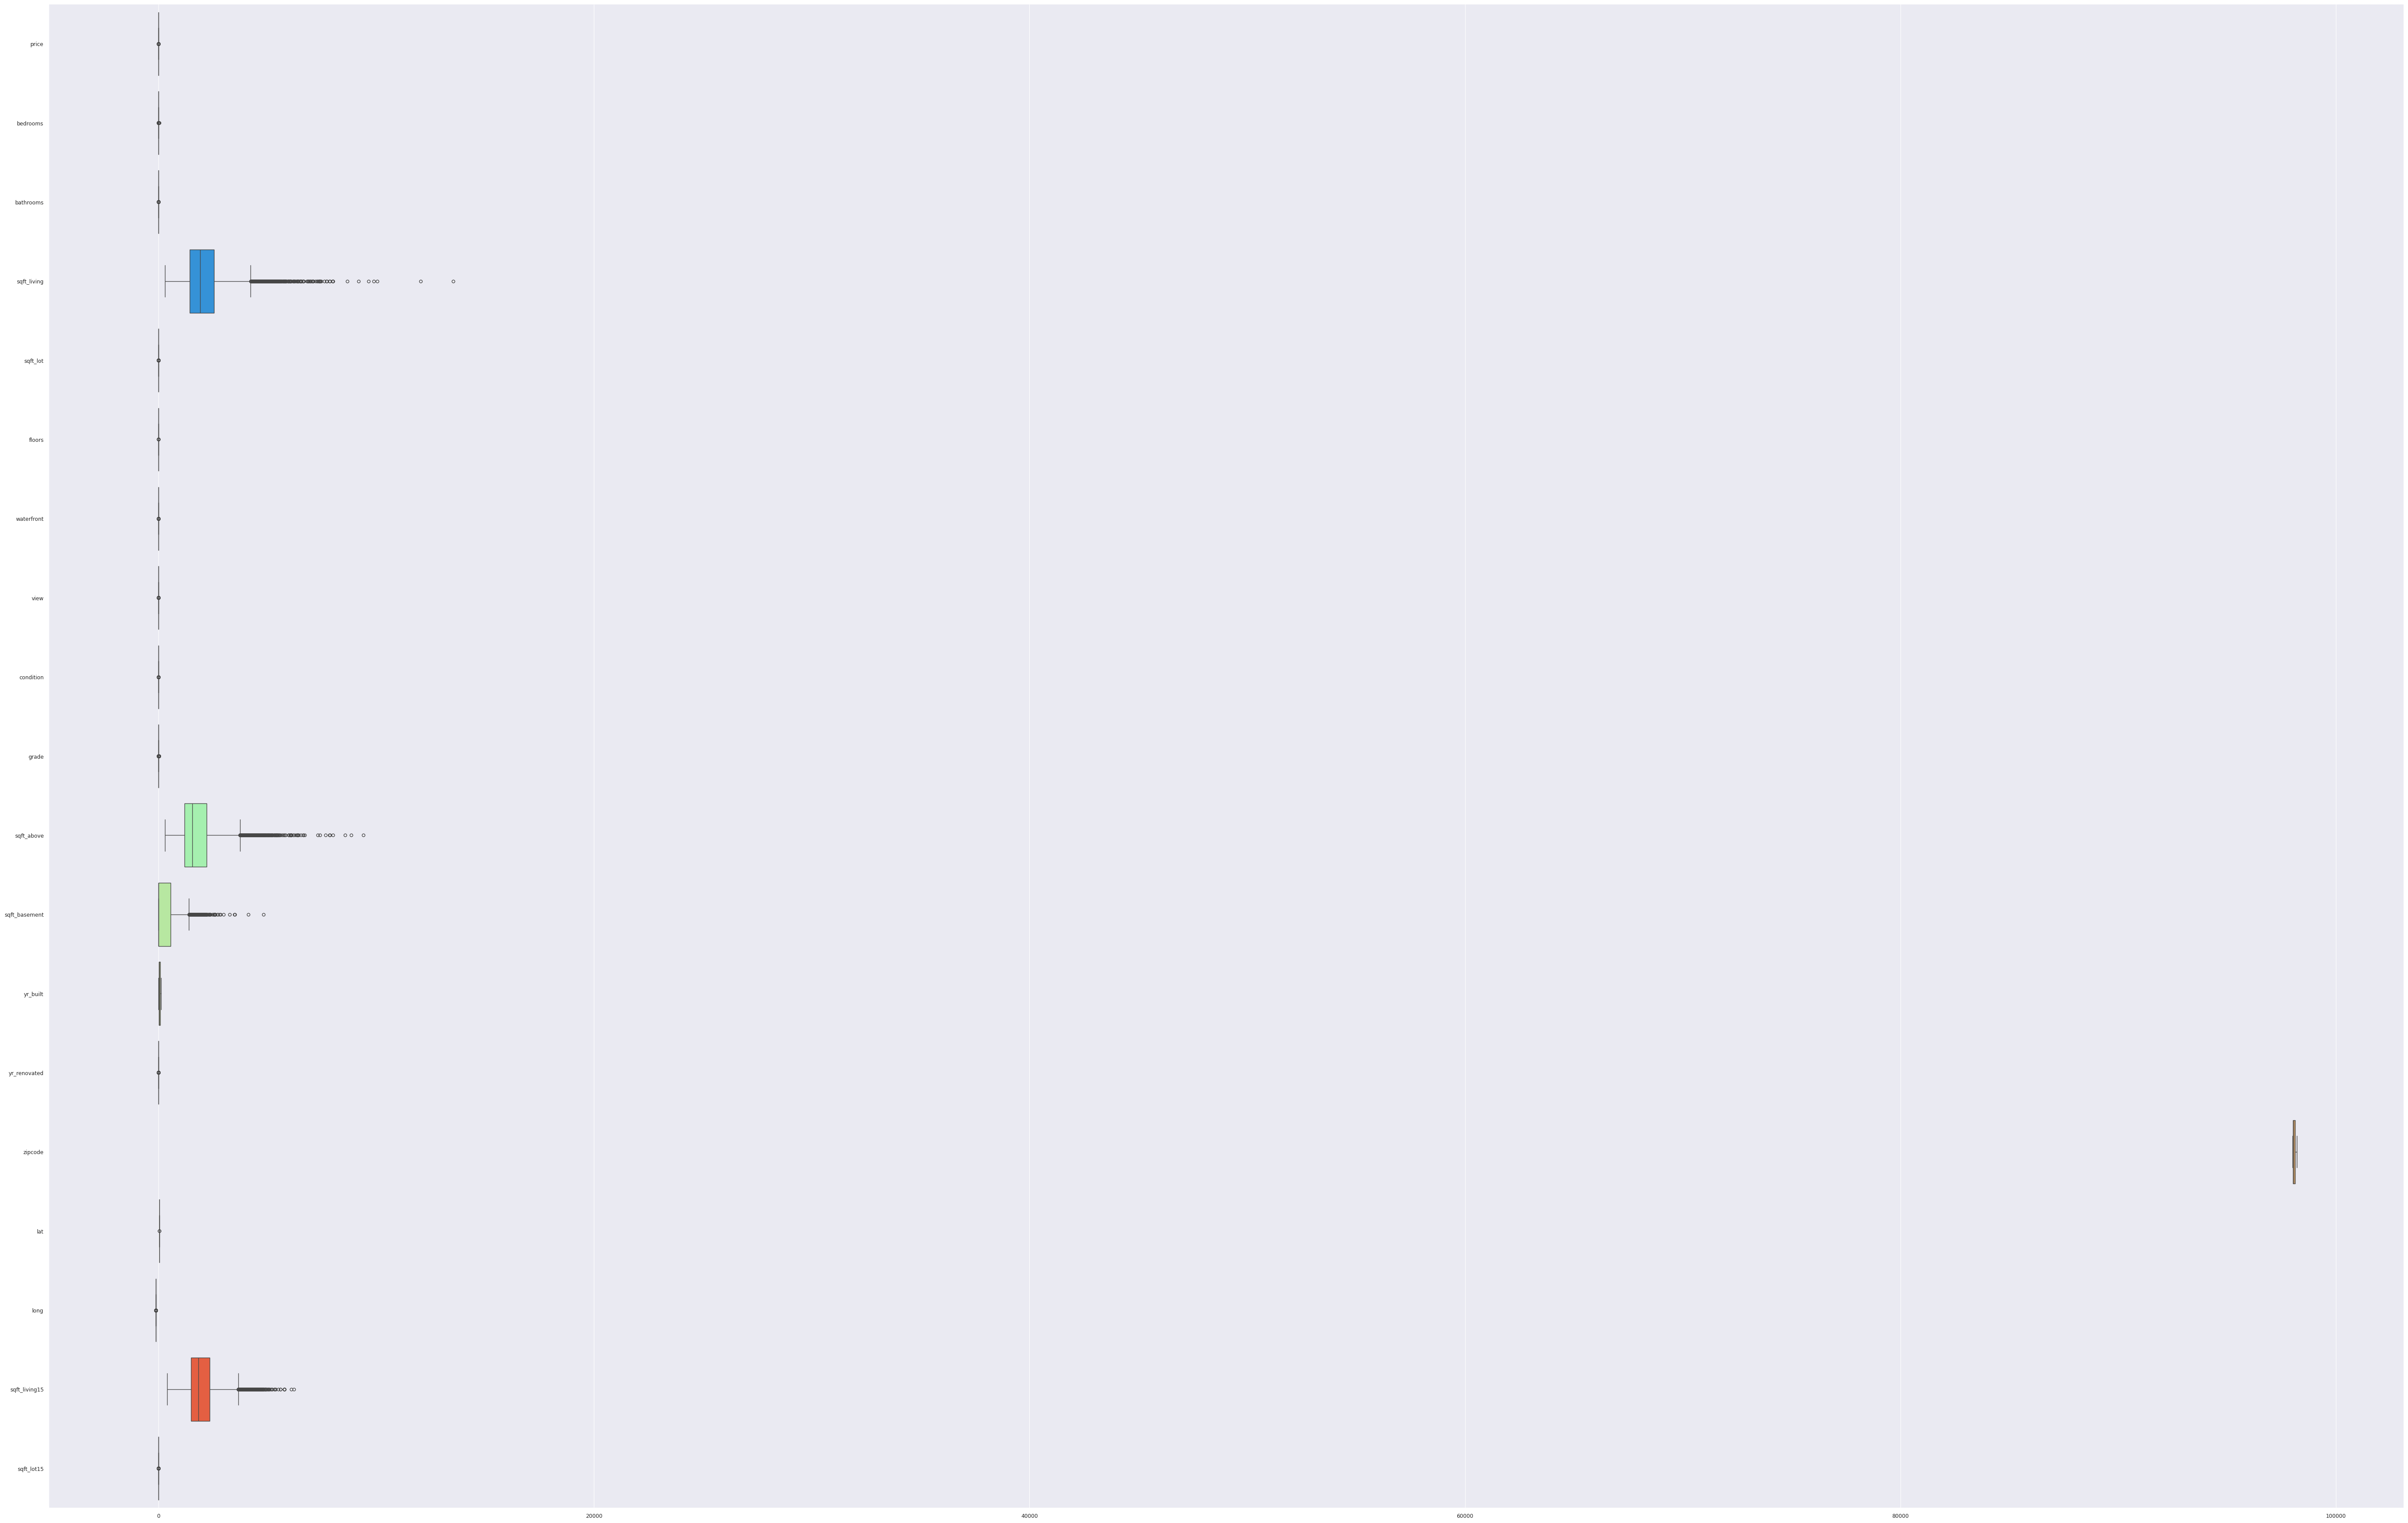

In [60]:
# Checking outliers
plt.figure(figsize= (70,45))
sns.boxplot(data=df,palette='rainbow',orient='h')

In [61]:
#lets cout them

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

,0
price,723
bedrooms,546
bathrooms,7762
sqft_living,572
sqft_lot,2014
floors,8
waterfront,163
view,2124
condition,30
grade,1911


In [62]:
def Remove_Outlier_Indices(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList

In [63]:
# Index List of Non-Outliers
nonOutlierList = Remove_Outlier_Indices(df['lat'])
df = df[nonOutlierList]

In [64]:
#lets check

Q1 = df['lat'].quantile(0.25)
Q3 = df['lat'].quantile(0.75)
IQR = Q3 - Q1
((df['lat'] < (Q1 - 1.5 * IQR)) | (df['lat'] > (Q3 + 1.5 * IQR))).sum()

0

In [65]:
#we have a problem with(price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

M = df['sqft_living'].to_numpy()
df['sqft_living']=scaler.fit_transform(M.reshape(-1,1))


M = df['sqft_above'].to_numpy()
df['sqft_above']=scaler.fit_transform(M.reshape(-1,1))

M = df['sqft_basement'].to_numpy()
df['sqft_basement']=scaler.fit_transform(M.reshape(-1,1))

M = df['sqft_living15'].to_numpy()
df['sqft_living15']=scaler.fit_transform(M.reshape(-1,1))

<Axes: >

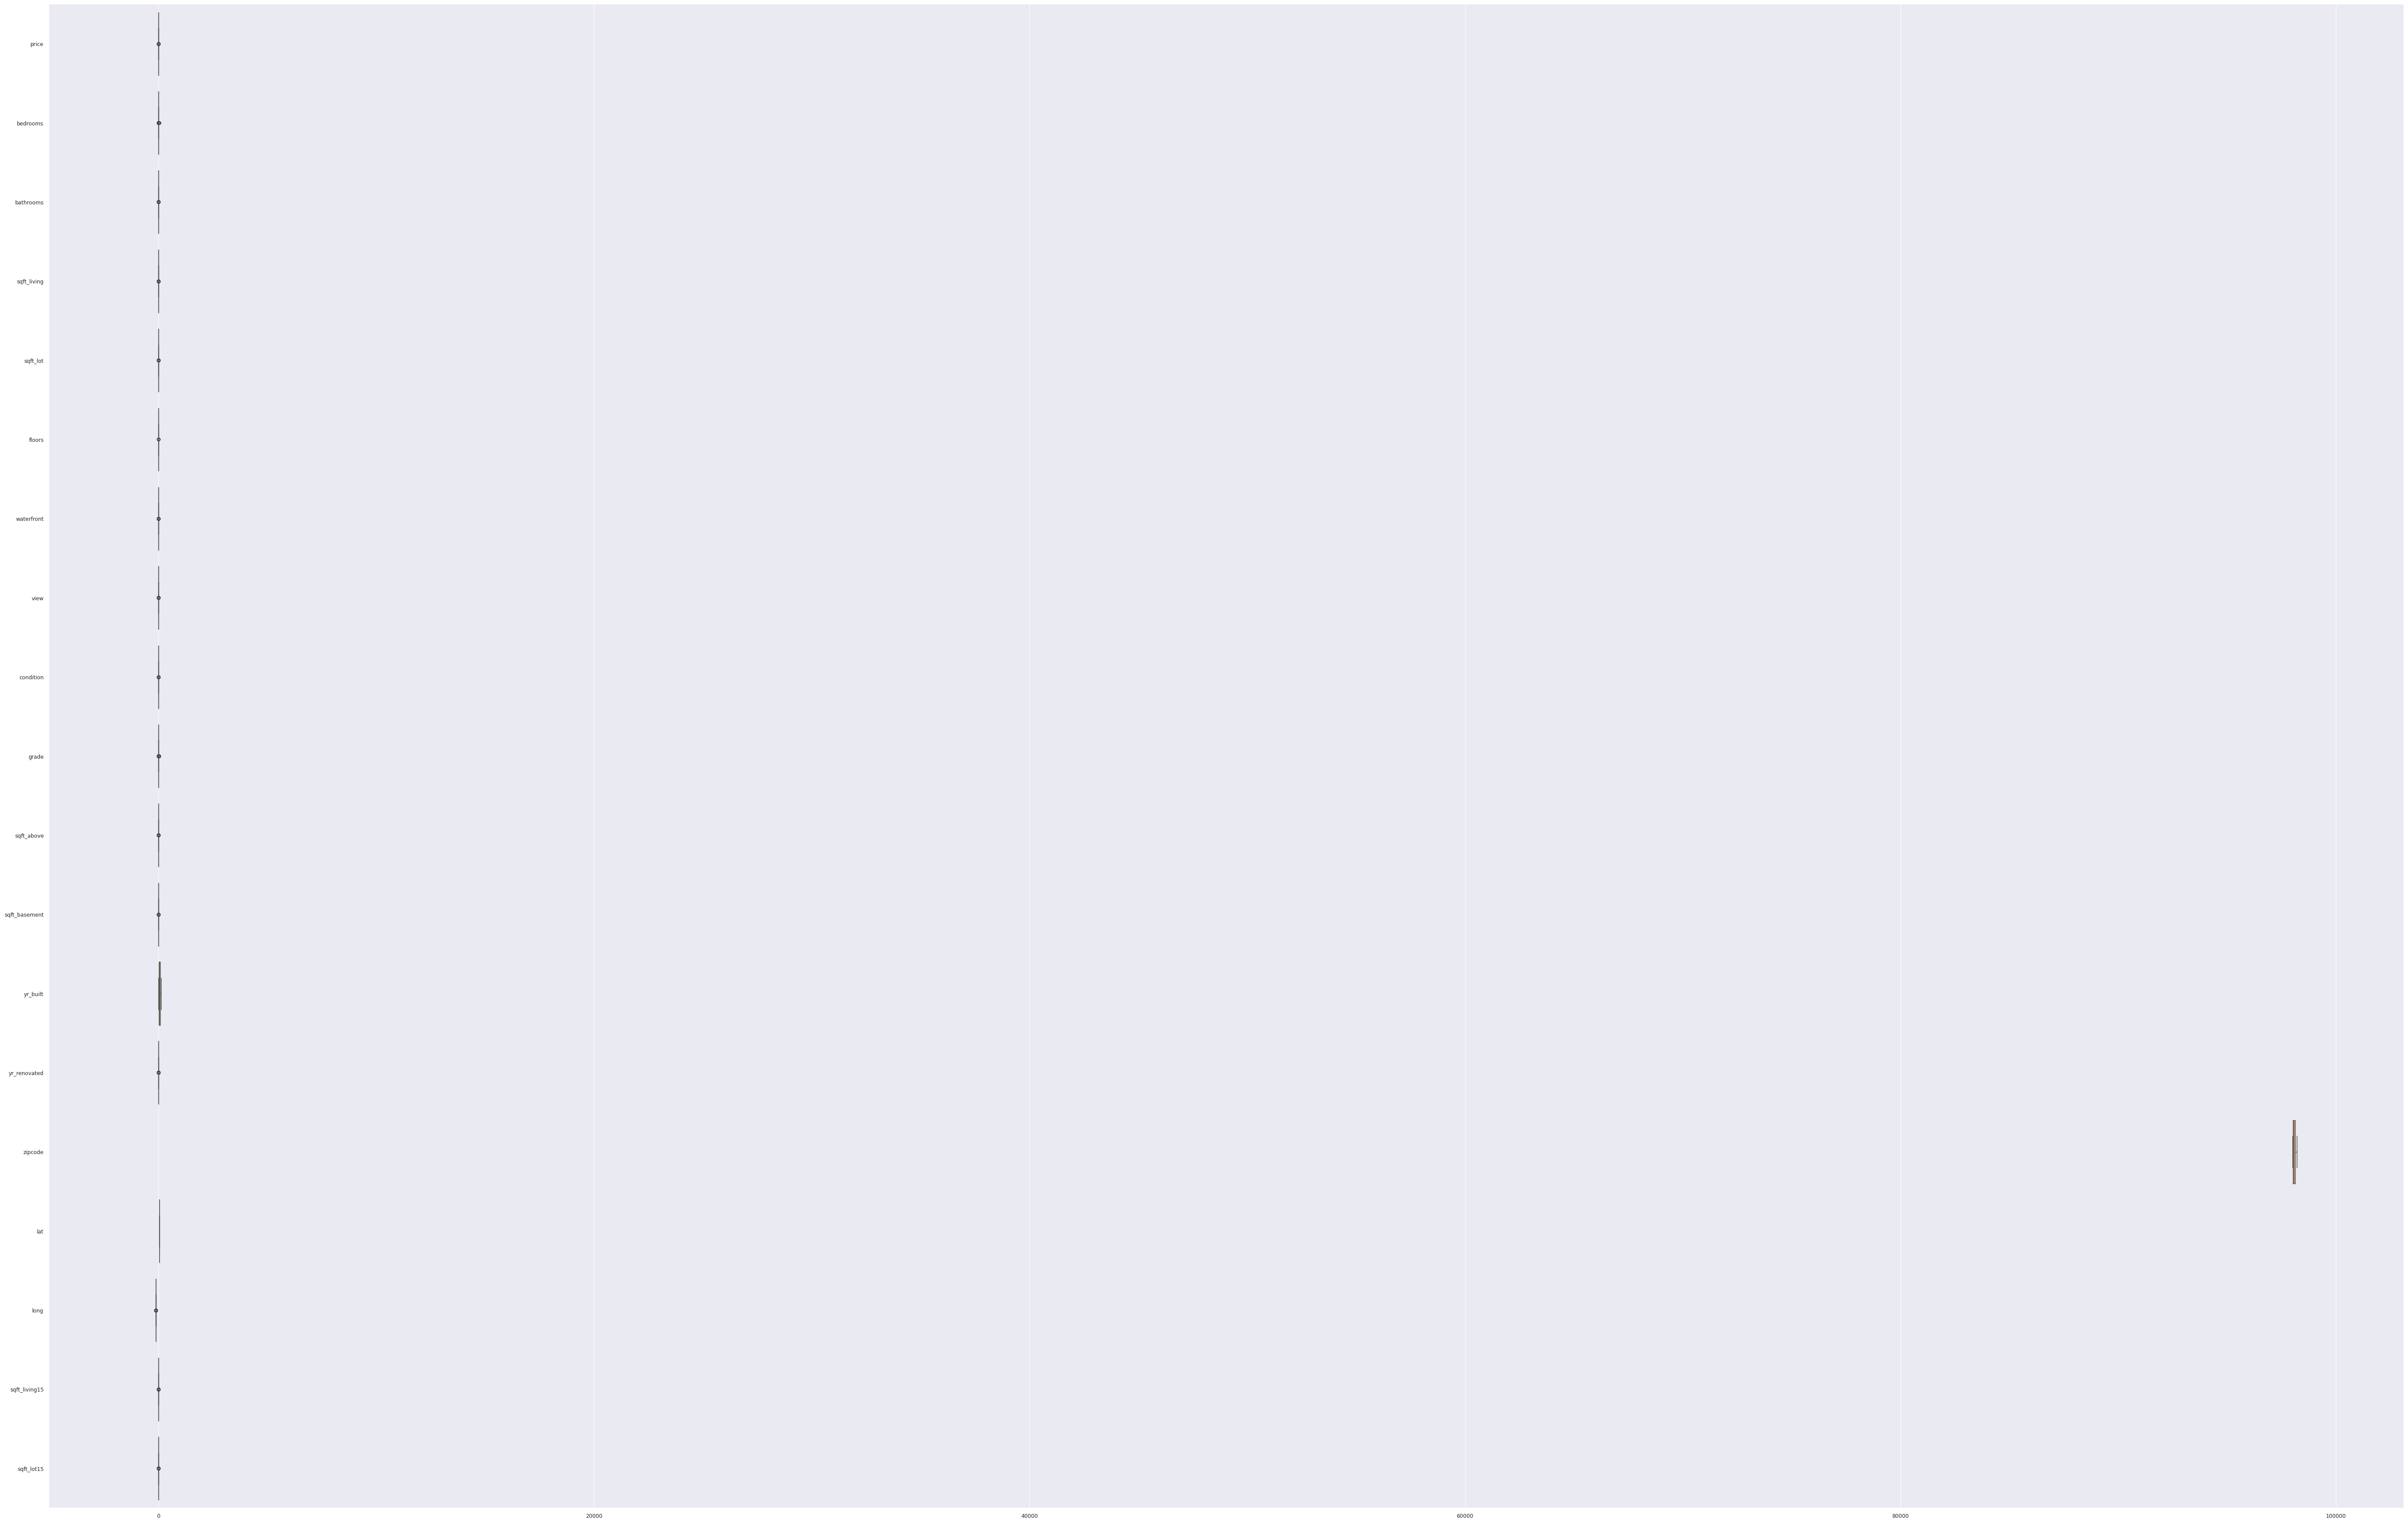

In [66]:
plt.figure(figsize= (70,45))
sns.boxplot(data=df,palette='rainbow',orient='h')

In [68]:

#scaling all features
scaler=MinMaxScaler()
M = df['yr_built'].to_numpy()
df['yr_built']=scaler.fit_transform(M.reshape(-1,1))

M = df['zipcode'].to_numpy()
df['zipcode']=scaler.fit_transform(M.reshape(-1,1))

M = df['lat'].to_numpy()
df['lat']=scaler.fit_transform(M.reshape(-1,1))

M = df['long'].to_numpy()
df['long']=scaler.fit_transform(M.reshape(-1,1))

In [69]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.078848,3,1.0,0.067170,0.041484,1.0,0.0,0,3,7,0.097588,0.000000,0.521739,0.000000,0.893939,0.567111,0.217608,0.161934,0.054691
1,0.183774,3,2.0,0.172075,0.049354,2.0,0.0,0,3,7,0.206140,0.082988,0.556522,0.994027,0.626263,0.908027,0.166113,0.222165,0.068167
2,0.060136,2,1.0,0.036226,0.061158,1.0,0.0,0,3,6,0.052632,0.000000,0.713043,0.000000,0.136364,0.935489,0.237542,0.399415,0.070797
3,0.201243,4,3.0,0.126038,0.037954,1.0,0.0,0,5,7,0.083333,0.188797,0.434783,0.000000,0.681818,0.582710,0.104651,0.165376,0.049783
4,0.176040,3,2.0,0.104906,0.053147,1.0,0.0,0,3,8,0.152412,0.000000,0.243478,0.000000,0.368687,0.738707,0.393688,0.241094,0.067306


In [70]:
#selecting price as a target
X=df.iloc[:,1:].values
y=df.iloc[:,0].values

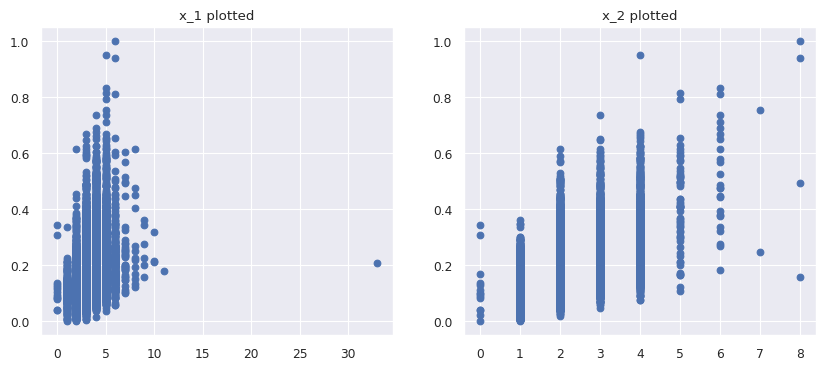

In [71]:
#plotting the first two features
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
x_1=df.iloc[:,1]
x_2=df.iloc[:,2]
axes[0].scatter(x_1, y)
axes[1].scatter(x_2, y)
axes[0].set_title("x_1 plotted")
axes[1].set_title("x_2 plotted")
plt.show()

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
poly_reg= PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=1)

lin_reg=LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [73]:
poly_reg_y_predicted = lin_reg.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
poly_reg_rmse

0.03276428385256046

In [74]:
 from sklearn.metrics import r2_score
 r2_score(y_test, poly_reg_y_predicted)

0.8509473348496498

<Axes: xlabel='price', ylabel='Count'>

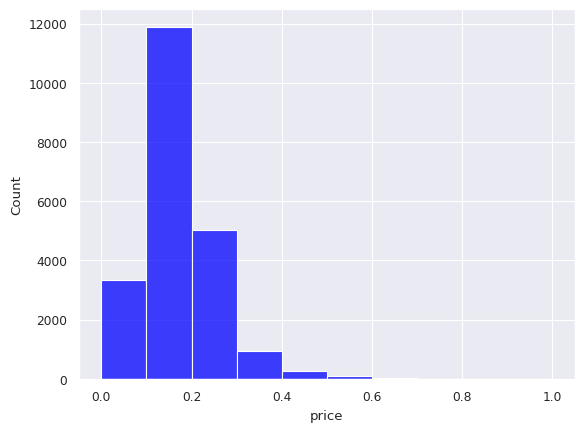

In [75]:
sns.histplot(data=df, x="price", color="blue",bins=10)

In [76]:
#choosing threshold (0.7) (we will check if it is the best value or not below)
quantiles = df['price'].quantile([0.7])
#labeling of groups
df['group'] = 0
df['group'][df['price'] < quantiles[0.7] ] = 1

In [77]:
#take a look on groups column
df['group'].unique()

array([1, 0])

<Axes: >

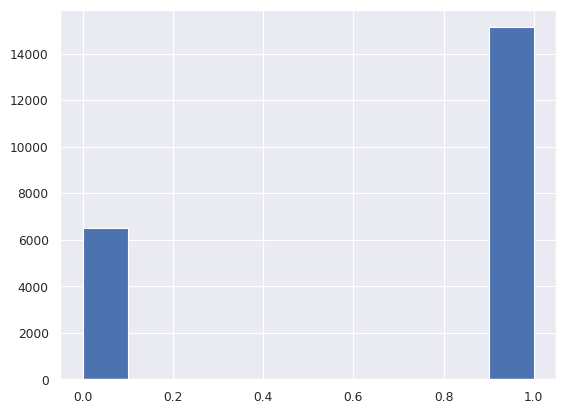

In [78]:
df['group'].hist() #no values except 0 and 1

In [79]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,group
0,0.078848,3,1.0,0.067170,0.041484,1.0,0.0,0,3,7,0.097588,0.000000,0.521739,0.000000,0.893939,0.567111,0.217608,0.161934,0.054691,1
1,0.183774,3,2.0,0.172075,0.049354,2.0,0.0,0,3,7,0.206140,0.082988,0.556522,0.994027,0.626263,0.908027,0.166113,0.222165,0.068167,1


In [80]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [82]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [90]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

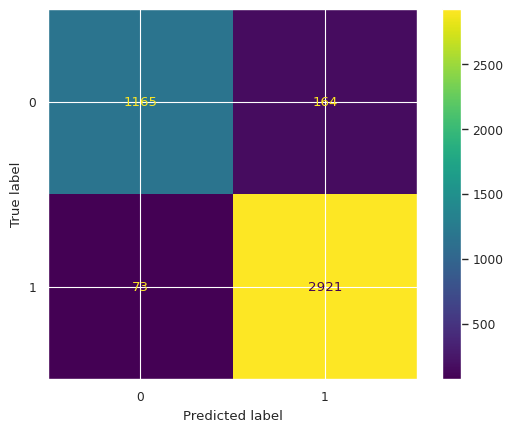

In [91]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(classifier, X_test, y_test)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have already trained your classifier and have X_test and y_test
# ...

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)  # Assuming classifier has classes_ attribute

# Plot the confusion matrix
disp.plot()
plt.show()

In [107]:
pip install plot-metric

In [108]:
!pip install -U plot-metric

In [109]:
!pip install -U scikit-learn

AUC: 0.9261084245239916


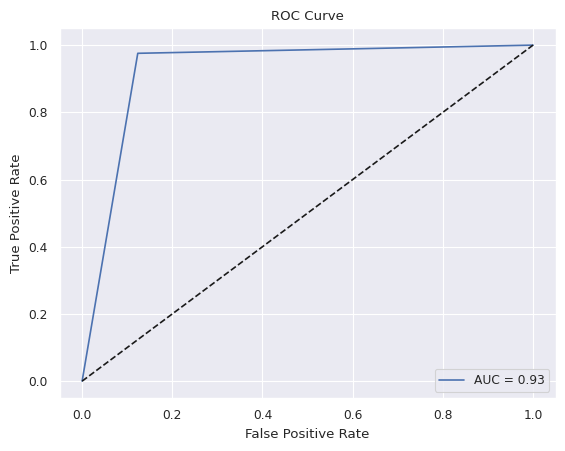

In [113]:
from sklearn import metrics
import matplotlib.pyplot as plt

# After your model prediction:
# y_pred = classifier.predict(X_test)

# Calculate and print the AUC score
auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC:", auc)

# Plot the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [114]:
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred)

#print AUC score
print(auc)

0.9261084245239916


In [115]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1329
           1       0.95      0.98      0.96      2994

    accuracy                           0.95      4323
   macro avg       0.94      0.93      0.93      4323
weighted avg       0.95      0.95      0.94      4323



In [116]:
from sklearn.neighbors import KNeighborsClassifier
for k in range(3,10,2):
      knn = KNeighborsClassifier(n_neighbors=k)

      knn.fit(X_train, y_train)

# Calculate the accuracy of the model
      print("k= ",k,"acc =", knn.score(X_test, y_test) * 100)

k=  3 acc = 88.57275040481147
k=  5 acc = 88.08697663659495
k=  7 acc = 88.17950497339811
k=  9 acc = 88.27203331020125


In [117]:
#first drop groups column
df.drop(columns='group',axis=1,inplace = True)

<Axes: xlabel='yr_built', ylabel='Count'>

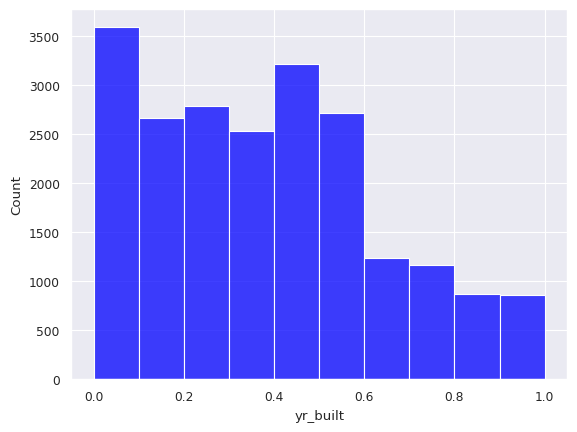

In [118]:
sns.histplot(data=df, x="yr_built", color="blue",bins=10)

In [119]:
#dividing ranges
quantiles = df['price'].quantile([0.7])
#labeling of groups
df['group'] = 0
df['group'][df['price'] < quantiles[0.7] ] = 1

In [120]:
df['group'].unique()

array([1, 0])

In [121]:
#selecting the new group column as target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [123]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

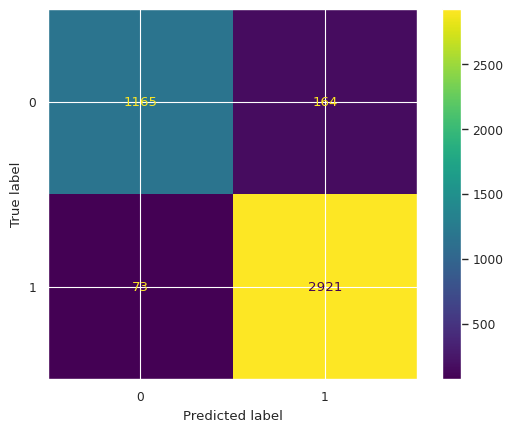

In [133]:
# Making the Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have already trained your classifier and have X_test and y_test
# ...

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)  # Assuming classifier has classes_ attribute

# Plot the confusion matrix
disp.plot()
plt.show()

In [145]:
!pip install -U plot-metric

In [146]:
!pip install -U scikit-learn

AUC: 0.9261084245239916


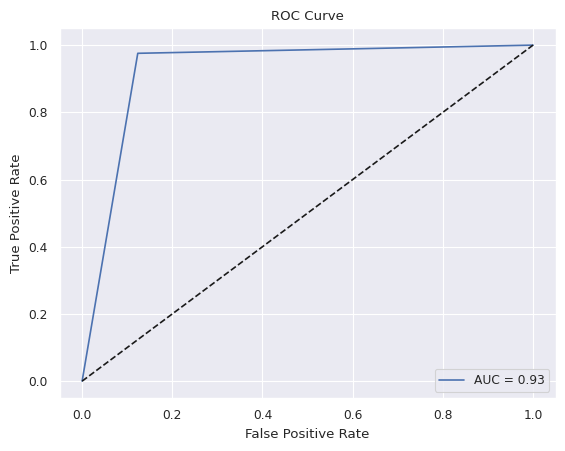

In [147]:
from sklearn import metrics
import matplotlib.pyplot as plt

# After your model prediction:
# y_pred = classifier.predict(X_test)

# Calculate and print the AUC score
auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC:", auc)

# Plot the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [148]:
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred)

#print AUC score
print(auc)

0.9261084245239916


In [149]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [150]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1329
           1       0.95      0.98      0.96      2994

    accuracy                           0.95      4323
   macro avg       0.94      0.93      0.93      4323
weighted avg       0.95      0.95      0.94      4323



In [151]:
from sklearn.neighbors import KNeighborsClassifier
for k in range(3,10,2):
      knn = KNeighborsClassifier(n_neighbors=k)

      knn.fit(X_train, y_train)

# Calculate the accuracy of the model
      print("k= ",k,"acc =", knn.score(X_test, y_test) * 100)

k=  3 acc = 88.57275040481147
k=  5 acc = 88.08697663659495
k=  7 acc = 88.17950497339811
k=  9 acc = 88.27203331020125


# New Section